In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

### ***TEST-I***: **AoA Data Spread**

In [2]:


# FILE NAME HANDLING
def get_files(DIRECTORY):
    filenames = os.listdir(DIRECTORY)
    return [filename.split('.')[0] for filename in filenames]


def extract_data(FILE_NAME): 
    environment, distance, angle = FILE_NAME.split('_')
    return environment,int(distance),int(angle)

C:\Users\Admin\AppData\Local\Temp\ipykernel_11736\1735586851.py:46: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(angles_radian, distances,s=size, c=colors,marker=marker_style,label="%dcm"%distance)


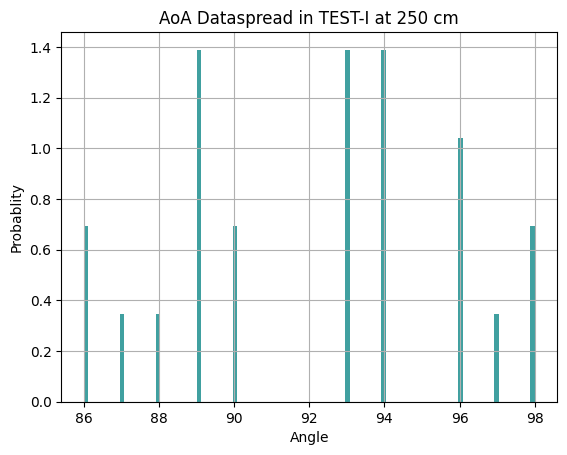

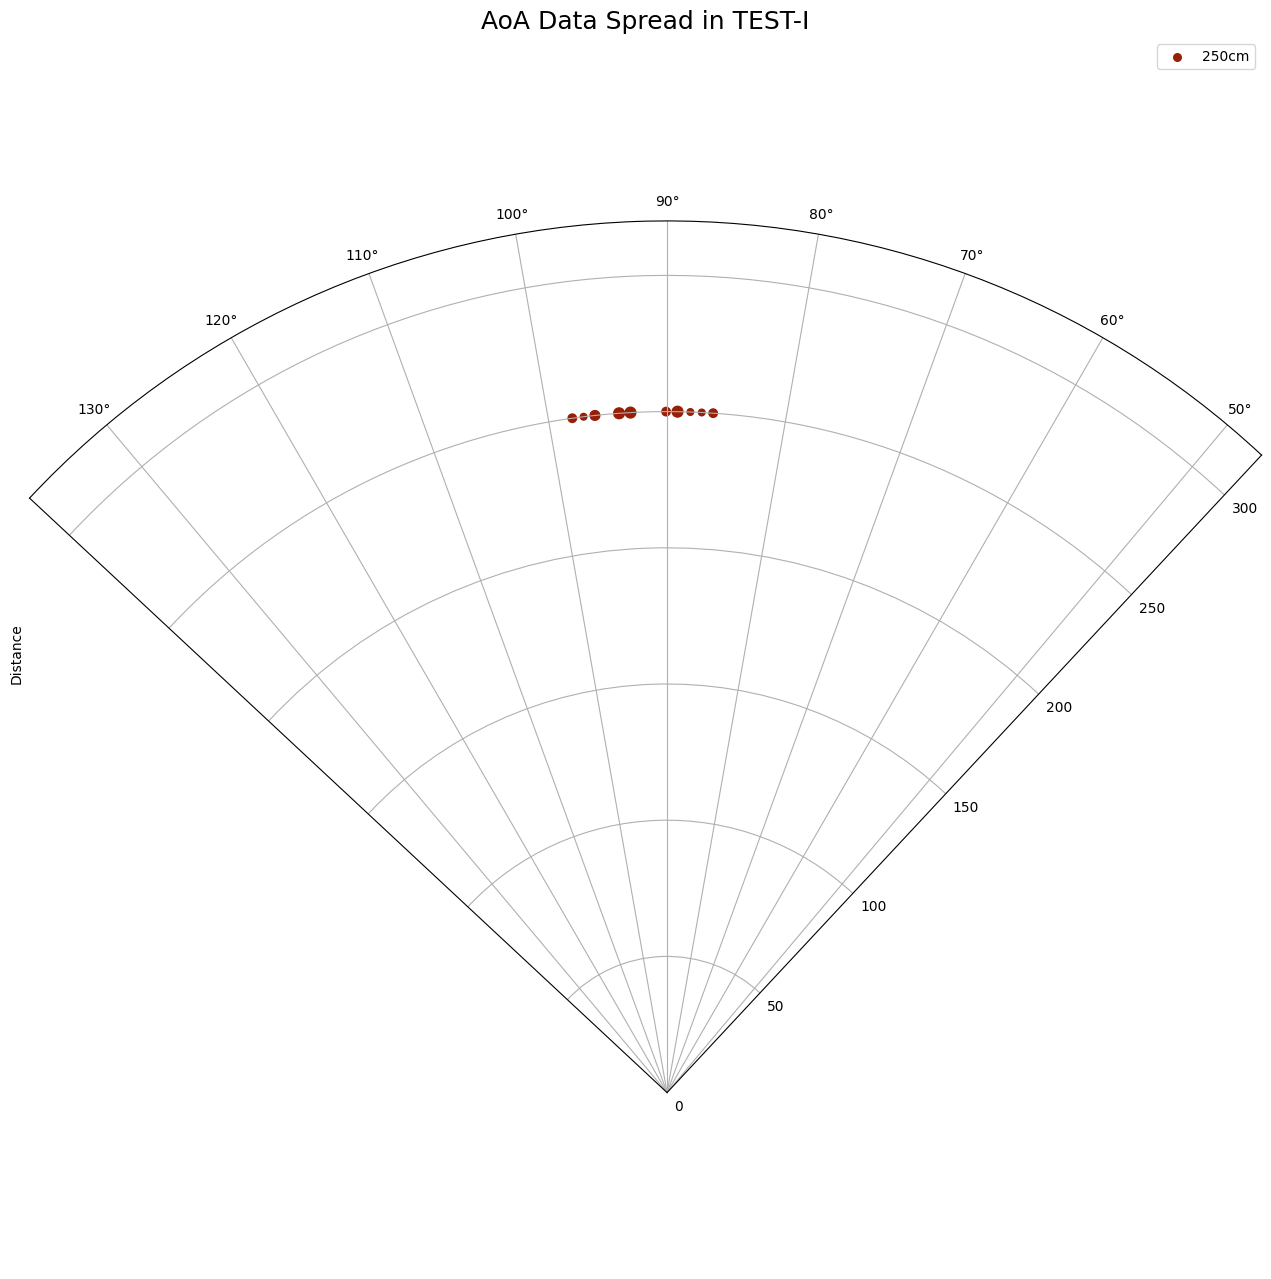

In [14]:
data_dir = './results_npz/'
results_dir = './results_images/'
interested_environment = 'TEST-I'
hist_bins = 100
polar_bins = 100

# PARAMETERS
interested_angle = 92
file_search = 40

# HISTOGRAM
for file_name in get_files(data_dir):
    environment, distance, angle = extract_data(file_name)
    if environment==interested_environment and angle==file_search:
        calculated_angles = np.load(data_dir+file_name+'.npy')

        
        n, bins, patches = plt.hist(calculated_angles, hist_bins, density=True, facecolor='teal', alpha=.75)
        plt.xlabel('Angle')
        plt.ylabel('Probablity')
        plt.title('AoA Dataspread in %s at %d cm'% (interested_environment,distance))
        plt.grid(True)
        plt.savefig(results_dir+file_name+'_hist')

# CREATE A POLAR SCATTER PLOT
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111, projection='polar')

for file_name in get_files(data_dir):
    environment, distance, angle = extract_data(file_name)
    if environment==interested_environment and angle==file_search:
        calculated_angles = np.load(data_dir+file_name+'.npy')

        freqs, angles = np.histogram(calculated_angles,polar_bins,density=True)
        angles_radian = np.radians(angles[1:])



        # ATTRIBUTES
        distances = distance*np.ones(polar_bins)
        colors = np.random.rand(3)
        marker_style = 'o'
        size = (freqs * distance)**.7

        # PLOTTING THE POINTS
        ax.scatter(angles_radian, distances,s=size, c=colors,marker=marker_style,label="%dcm"%distance)


ax.set_ylim([0, 320])
ax.set_thetamin(interested_angle-45)
ax.set_thetamax(interested_angle+45)
ax.set_title('AoA Data Spread in %s'% interested_environment, fontsize=18)
ax.set_ylabel("Distance")
plt.legend(loc="upper right")
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig(results_dir+interested_environment+'_'+str(interested_angle)+'_'+'_polar')

### ***TEST-II***: **RELATIVE ACCURACY**

In [20]:
def get_color(ANGLE):
    if ANGLE==0:
        return [.87,.56,.28]
    if ANGLE==90:
        return [.56,.34,.87]
    return np.random.rand(3)

C:\Users\Admin\AppData\Local\Temp\ipykernel_11736\3764914791.py:26: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(angles_radian, distances,s=size, c=colors,marker=marker_style,label="%.2f degree"%angle)


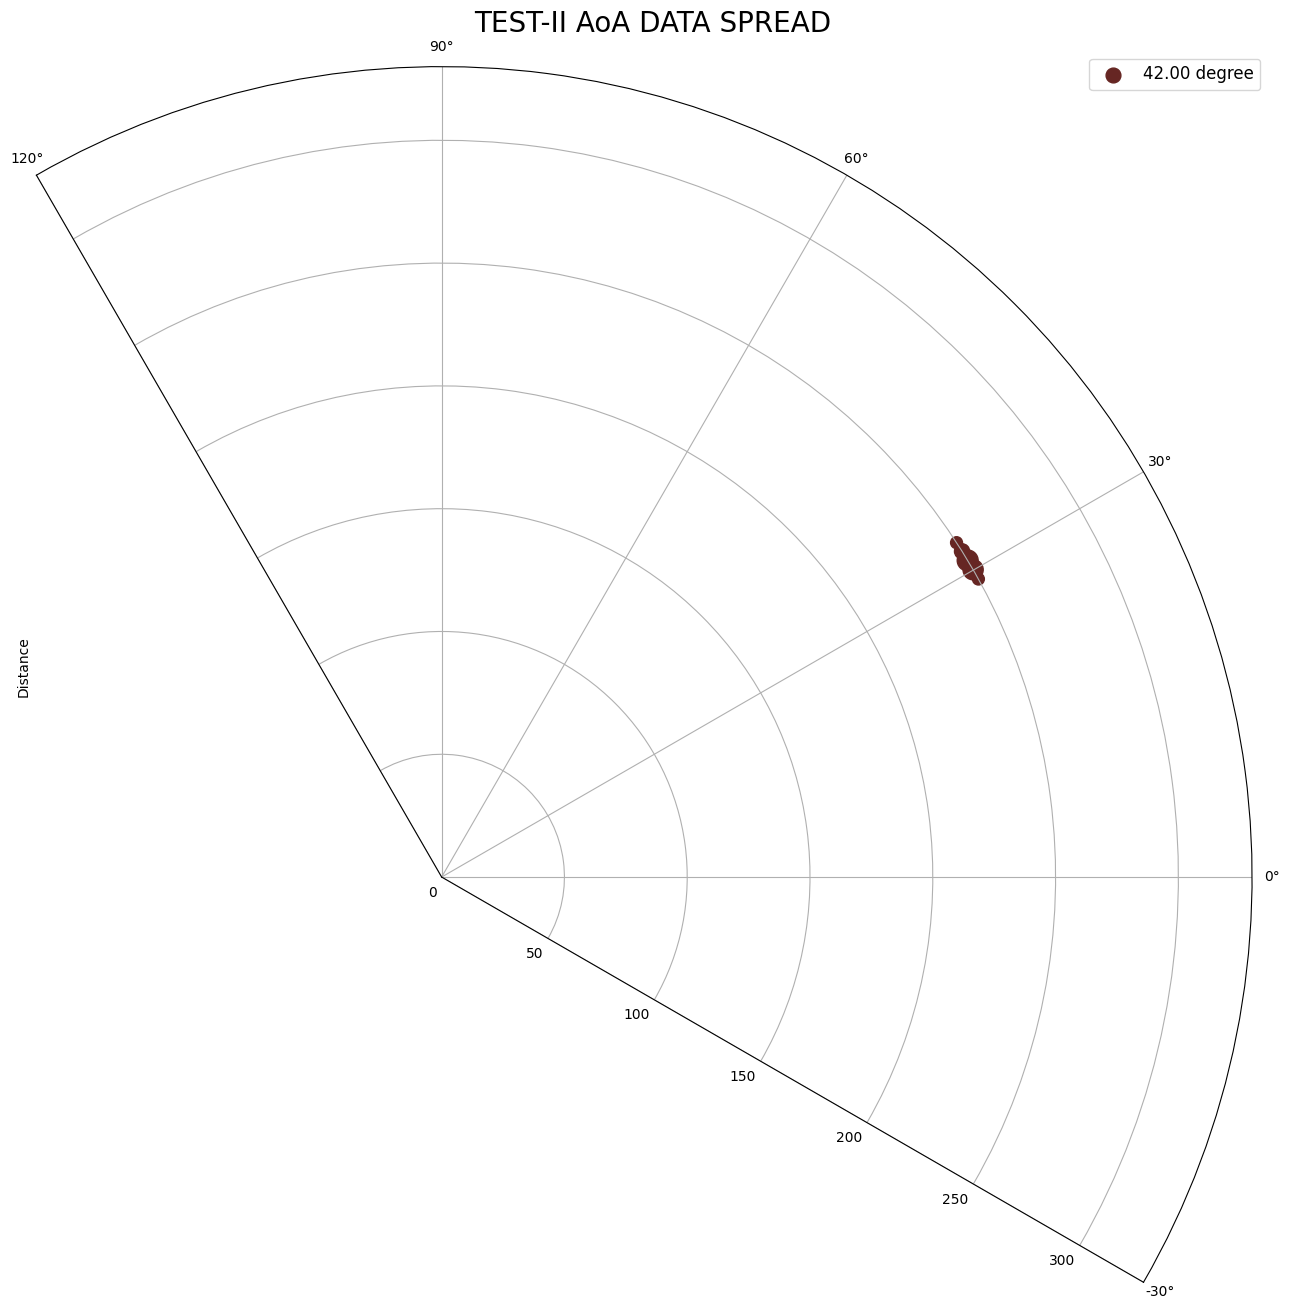

In [31]:
# VISUALIZING THE DATA
data_dir = './results_npz/'
results_dir = './results_images/'
interested_environment = 'TEST-II'

# CREATE A POLAR SCATTER PLOT
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111, projection='polar')


for file_name in get_files(data_dir):
    environment, distance, angle = extract_data(file_name)
    if environment == interested_environment:
        calculated_angles = np.load(data_dir+file_name+'.npy')

        freqs, angles = np.histogram(calculated_angles,polar_bins,density=True)
        angles_radian = np.radians(angles[1:])

        # ATTRIBUTES
        distances = distance*np.ones(polar_bins)
        colors = get_color(angle)
        marker_style = 'o'
        size = (freqs * distance)**.7

        # PLOTTING THE POINTS
        ax.scatter(angles_radian, distances,s=size, c=colors,marker=marker_style,label="%.2f degree"%angle)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
# Set the limit for the radial axis
ax.set_ylim([0, 330])
ax.set_thetamin(-30)
ax.set_thetamax(120)
# Add a title to the plot
ax.set_title('%s AoA DATA SPREAD'%interested_environment, fontsize=20)
ax.set_ylabel("Distance")

plt.legend(by_label.values(), by_label.keys(),loc='upper right',prop={'size':12})
# Show the plot
plt.savefig(results_dir+interested_environment)
plt.show()